# Clustering Wheat Kernels Using Machine Learning

In this notebook, I have uploaded a large dataset that contain several characteristics describing wheat kernels. I originally received this dataset from Emory University.

Throughout this notebook you will find that I use several Python packages, which will need to be imported. You will also find several visualization graphs of the data for data exploratory purposes.

Please let me know if you have any questions and connect with me on the following platforms:
Contact Information:

* Github: www.github.com/CarlosBusiness
* Linkedin: www.linkedin.com/in/CarlosJonesData
* Twitter: www.twitter.com/winners_analyze
* Email: carlosjones.business@gmail.com

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

## 1. Data Collection

In [3]:
X=pd.read_csv('seeds.csv')# Your code

In [4]:
X.head(3)

,15.26,14.84,0.871,5.763,3.312,2.221,5.22
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805


**Lets look at the shape**

In [5]:
X.shape

(209, 7)

**Name the columns with the following names and print first three rows of dataframe**

##### Lets name our columns the following:

1. area
2. perimeter
3. compactness
4. lkernel
5. wkernel
6. asymmetry
7. lkg (length of kernel groove)

In [6]:
names=['area','perimeter','compactness','lkernel','wkernel','assymetry','lkg']
X.columns=names
X

,area,perimeter,compactness,lkernel,wkernel,assymetry,lkg
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


## 2. Data Visualization

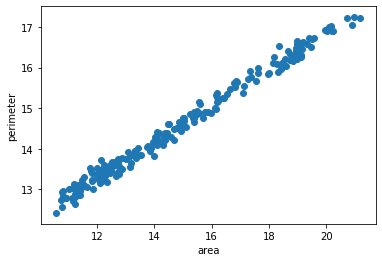

In [7]:
plt.scatter(X['area'], X['perimeter'])# we are visualizaing the data with just two attributes. 
plt.xlabel('area')
plt.ylabel('perimeter')
plt.show()


## 3. K-Means Clustering 

In [8]:
from sklearn.cluster import KMeans

###### Lets choose 2 clusters for now, and then perform our elbow method afterwards to see if the number of clusters should change

In [9]:
kmc=KMeans(n_clusters=2, random_state = 0)
kmc.fit(X)
kmc.predict(X)

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
centers=kmc.cluster_centers_
centers

array([[17.9746988 , 15.96674699,  0.88436867,  6.09031325,  3.64545783,
         3.43732651,  5.91243373],
       [12.78428571, 13.62992063,  0.86219127,  5.32327778,  3.00334921,
         3.88510397,  5.0773254 ]])

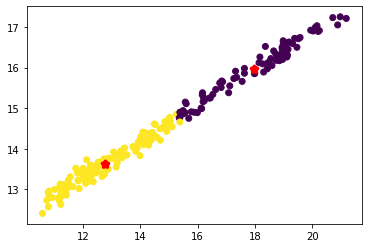

In [11]:
plt.scatter(X['area'],X['perimeter'], c=kmc.predict(X)) 
plt.scatter(centers[:,0], centers[:,1], marker = '*', linewidth = 4, c='r')

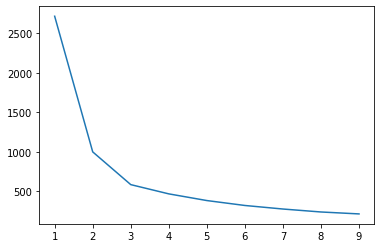

In [12]:
SS = []
NC = range(1,10)
for k in NC:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    SS.append(km.inertia_)
plt.plot(NC,SS)
plt.show()

###### Elbow method shows that there should be 4 clusters 

In [12]:
kmc4=KMeans(n_clusters=4, random_state=0)
kmc4.fit(X)
kmc4.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
centers2=kmc4.cluster_centers_
centers2

array([[14.08068966, 14.18448276,  0.87834828,  5.47062069,  3.21082759,
         2.37262414,  5.06318966],
       [16.40806452, 15.31935484,  0.87826452,  5.86396774,  3.46332258,
         3.85009677,  5.69045161],
       [11.91861111, 13.25680556,  0.85122222,  5.225625  ,  2.86531944,
         4.8855    ,  5.08747222],
       [19.15104167, 16.46916667,  0.88708958,  6.26885417,  3.7729375 ,
         3.46041667,  6.12725   ]])

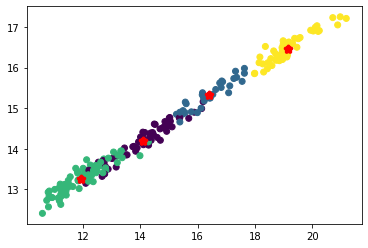

In [15]:
plt.scatter(X['area'],X['perimeter'], c=kmc4.predict(X)) 
plt.scatter(centers2[:,0], centers2[:,1], marker = '*', linewidth = 4, c='r')

In [16]:
X['cluster']=kmc4.predict(X)

In [17]:
X.head()

,area,perimeter,compactness,lkernel,wkernel,assymetry,lkg,cluster
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,0
